In [2]:
############################################ 라이브러리 로드 #########################################
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
%matplotlib inline
#######################################################################################################


#데이터프레임 출력범위 확장
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)



#파일 불러오기
zigzag = pd.read_csv('raw_zigzag_data.csv', index_col=[0])
brandy = pd.read_csv('raw_brandy_data.csv', index_col=[0])
ably = pd.read_csv('raw_ably_data.csv', index_col=[0])



# 리뷰 = 제목 + 내용
def join_title(df):
    df['리뷰'] = df['제목'] + ' ' + df['내용']
    df.drop(['제목','내용'], axis = 'columns', inplace = True) 
    return df



# 텍스트에 있는 특수 문자 & 자모음 & 하트이모지 제거
# 지****' 와 같이 지그재그를 칭하는 문자 추출위해 '*'는 남겨둠

def clean_text(readData):
    text = re.sub('[-=+,#/\?:^$.@\ㅠㄷㅜㅎㅋ❤️;"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', readData)
    return text



# 텍스트에 있는 이모티콘 제거
def clean_emoji(text):
    only_BMP_pattern = re.compile("["
        u"\U00010000-\U0010FFFF"  
                           "]+", flags=re.UNICODE) # BMP characters 이외
    return only_BMP_pattern.sub(r'', text) # BMP characters만



def clean_review(df):
    df = join_title(df)
    df['리뷰'] = df.리뷰.apply(clean_text)
    df['리뷰'] = df.리뷰.apply(clean_emoji)
    
    #무배 -> 무료배송
    df['리뷰'] = df['리뷰'].str.replace('무배','무료배송')
    return df



if __name__ == '__main__':
    
    지그재그 = clean_review(zigzag)
    에이블리 = clean_review(ably)
    브랜디 = clean_review(brandy)

C:\ProgramData\Anaconda3\envs\tfV1_env\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  app.launch_new_instance()


In [4]:
지그재그.head()

,작성날짜,평점,리뷰
0,2020년 6월 17일,5,중국쇼핑몰 사이트 대충 만들어놓고 카피한 중국산 제품을 타쇼핑몰 모델컷 맘대로 가져와서 파는데가 몇몇 있어요 수입의류 이러면서 그거 제한 필요할 것 같아요 잘쓰고있어요
1,2020년 9월 9일,1,음 절이 싫으면 중이 떠나야 맞는 거겠죠 지그재그 어플 초반부터 굉장히 유용하게 잘 사용해왔습니다 20대 중반이 되어서 까지도 옷을 비롯해서 머리끈 핸드폰 케이스까지 여러 제품을 구매하고는 했었는데 이제는 다른 어플을 사용하려고 합니다 어느 순간부터 과도한 포토샵을 사용하고 게시글에 응답하지 않는 해외 연결 해외 직구 사이트들이 많이 늘어난 거 같습니다 이 부분은 지그재그에서 제재를 해야 한다고 생각합니다 제품이 마음에 들어서 상세 제품이나 착용 제품들을 보면 세상 조그만 얼굴과 정말 너무나도 얇고 긴 다리 뒤로 휘어져 있는 배경 최소 2주일은 걸린다는 해외 직구 사이트 이 어플을 사용하는 연령대들의 타겟층을 잘 분석해 주셨으면 좋겠습니다 여러 이벤트나 광고를 떠나서 본 어플의 사용도를 파악하시고 발전해 나가시길 응원합니다
2,2020년 8월 3일,3,미리보기 부팅 오래걸리는 사이트들 개선 좀 해주세요 몇몇 사이트 개선이 너무 필요한 상황이고 미리보기조차 오래걸리면 들어갔다 나오기까지의 과정이 너무 귀찮습니다 미리보기 사진이 안 떠있는 사이트를 들어가보면 제품사진의 로딩이 너무 오래걸려 그냥 나오는 사이트들도 여럿 있습니다 제발 각 사이트 개선 좀 부탁드립니다 지그재그의 자사가 할 수 있는 개선범위가 아니면 사이트 업주분들께 피드백이라도 부탁드립니다 또한 사이트 속도가 일정 수준 이하면 안 받는 것도 하나의 방법이 될 것 같습니다
3,2020년 6월 14일,3,앱 자체는 정말 편하고 좋은데 배송느린 업체들이 너무 많네요 23주까지 처음 배송안내 메세지가 1달 뒤라고 오는 곳도있어요 한달보다는 빨리 받음 이런 업체들 너무 많다보니 이젠 잘 안쓰게 될 것 같아요필요한 때에 옷을 받기 너무 힘들어요
4,2020년 8월 3일,5,좋아요 근데 다 좋은데 네트워크 상태가 좋음에도 불구하고 상품이미지가 안떠요 직접 누르고 들어가서 확인해야만하는데 요거 고쳐주세요


In [5]:
브랜디.head()

,작성날짜,평점,리뷰
0,2020년 7월 1일,5,찐 쇼핑몰이네영 와 무료배송에 하루배송까지 여기서 안살수가 없어요 30대 사는 옷들 항상 궁금했는데 이번에 연령별 볼 수 있게 해주셔서 진짜 제 머리속 들어갔다 오심 Ai인가 추천도 넘 좋아영 포장 영상도 보내주시고 앞으로도 고객을 위하는 브랜디가 되시길
1,2020년 10월 5일,5,쇼핑 이걸로만 해요 제목 그대로 이거 깐지 1년 됐는데 이걸로만 쇼핑 한답니다 그정도로 한눈에 제품들 보기도 너무 좋고 할인도 많이 해주시고 쿠폰도 완전 혜자 배송도 빠르고 넘나 좋아요 진짜루 이거 깔기전엔 어떻게 쇼핑했나 모르겠어요 무료배송 진짜 너무 감사합니다 하루배송 기획도 최고
2,2020년 7월 14일,5,진짜진짜진짜최고 어플리뷰 처음써봐요‼‼ 브랜디 진짜 첫사용해보고 너무 좋아서 리뷰를 안쓸 수가 없었어요 하루배송에 첫구매 쿠폰으로 저렴하게 사서 기분 좋았는데 포장영상까지 꼼꼼히 보내주셔서 정말 좋았습니다 게다가 진짜 딱 새벽에 주문한 옷이 점심쯤에 도착해서 정말 놀랐어요 이 좋은걸 왜 이제야 깔았나 과거의 나 반성해 앞으로는 브랜디에서만 옷사게될 것 같아요
3,2020년 7월 3일,5,배송빠른거 너무 좋음 담날 놀러가는데 옷 없을때 브랜디 하루배송이 생각나서 얼른 구매했더니 진짜 새벽에 도착 너무너무 잘 이용하고 있어요 쇼핑몰쪽 배송으로는 브랜드가 1순위 찍을 것 같아요앞으로도 잘 부탁드립니당
4,2020년 7월 3일,5,아 진짜 이거 뭐에요 아진짜 이거 뭐냐구요 이거 왜이렇게 좋냐구요 인터넷 쇼핑하면서 아 이런기능 있었음 좋겠다 라고 생각한게 여기 다 모여 있다니 미쳤구만 진짜 내사랑 왜 이제야 깐것일까 나는 개발자분 어디계세요 그쪽으로 절할게요 흑흑 이걸로만 쇼핑한다


In [6]:
에이블리.head()

,작성날짜,평점,리뷰
0,2019년 2월 23일,5,좋아요 에이블리 쓴 지 거의 한 달이 다 되어가는 유저입니다* 다른 앱도 써 보았는데 에이블리가 제일 옷을 잘 모아놓은 것 같아서 에이블리만 계속 쓰고있어요* 쇼핑하기 참 좋은 앱인데 세 가지 아쉬운 점이 있어서 리뷰 남깁니다* 먼저 앱 내 검색창에 상품을 검색했을 때 인기순 최신순 저가순 으로 볼 수 있으면 좋겠습니다* 베스트 상품은 원하는 순으로 볼 수 있어서 편한데 검색을 하면 그렇게 볼 수 없더라구요* 두번째로는 후기 삭제가 안됩니다* 왜 그런지 모르겠네요* 세번째로는 주문한 상품이 품절이 되었을 시 환불 처리가 늦었습니다* 빨리빨리 되었음 더 좋겠네요* 끝으로 편한 앱 만들어 주셔서 너무 감사합니다*
1,2020년 6월 19일,1,반품 및 응대관련 여러 쇼핑 앱을 사용 하고 있고 에이블리와 비슷한 앱도 많이 사용하고 있지만 이렇게 당황스럽긴 처음입니다 물론 옷을 모아서 보여주는 역할이 전부라고 해도 각 마켓들과 소비자의 소통이 얼마나 원활히 되고 있는지 막힌 부분은 없는지 정도는 신경 써 주셔야 하는거 아닌가요 에이블리 어플 내 마이페이지 배송부분에서 반품신청 누르고 몇일이지나도 연락이 없길래 해당 마켓에 따로 글 올렸더니 원래 연락 안 간다고 이렇게 문의 해야 반품 신청 해 준다는데 그건 아니지 않나요 애초에 반품 신청을 하면 해당 마켓이랑 연동은 되게 해 두어야 하는거 아닌가요 진짜 다신 안 쓸 것 같습니다 조금 더 편하자고 통합 돼 있는 어플 쓰는건데 이건 참모르겠네요
2,2018년 10월 5일,5,나중에 되어서 품절이라고 얘기해주시는거 너무 속상해요 수량이 정해져 있으면 주문 받는 것도 수량에 맞춰서 받았으면 좋았을 텐데요 입금 다 해놨는데 나중에 돼서 품절이라고 재입고 어렵다고 환불처리나 다른 상품으로 교환해주신다 하셨을때 조금 속상해요 제가 예쁘게 입으려고 고심 끝에 고르고 선택해서 주문 했는데 티도 품절이라고 부분 배송 해주신다고 하시고 재고가 정해져 있으면 그 재고 수에 맞게 주문 받아주셨면 해요 입을 생각 하면서 잔뜩 기대에 부풀어 있었는데 말이죠
3,2018년 5월 1일,4,무료배송이 엄청난 강점이네요 지그재그만 쓰다 다른 어플 없나 찾다 우연히 접했네요 이 어플의 최고 자랑은 무료배송라는 것 같아요 그래서 더 이용객들이 늘 것 같은 다만 검색할때 상세조건 옵션으로 지정해서 찾아볼 수 있는 기능이랑 스크롤 업다운 기능도 있으면 좋겠어요
4,2018년 4월 12일,5,쓰기 편함 인스타 마켓 일일이 안들어가도 에이블리앱으로 모아서 볼 수있어서 개꿀 쿠폰도 자주 뿌림 사람들 잘 모르던데 여기 진짜 꿀은 공동구매임 진짜 좋은상품 엄청 저렴하게 판매함 공구 더많이해줘여여ㅕㅕㅕㅕㅕ


In [7]:
# 회사, 연도, 평점별 데이터

def filtered_data(comp,year,rating):
    filtered_year = comp['작성날짜'].str.contains(year)
    filtered_rating = comp['평점'] == rating
    df = comp[filtered_year & filtered_rating]
    return df    

In [8]:
# 날짜, 특정단어 포함된 리뷰 평점 평균 구하기

def Average_rating(comp,date,word):
    
    filtered_year = comp['작성날짜'].str.contains(date)
    filtered_word = comp['리뷰'].str.contains(word) 
    df = comp[filtered_year & filtered_word]
    
    return df['평점'].mean()

In [9]:
Average_rating(브랜디,'2020년','99데이')

1.0909090909090908

In [17]:
Average_rating(지그재그,'2020년','z결제')

4.583333333333333

In [10]:
# 폰트 설정

fm.get_fontconfig_fonts()
font_location = '/NanumSquare_acB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

In [11]:
def MakeNewdf(date):

    comp_dict = {'지그재그':지그재그,'브랜디':브랜디,'에이블리':에이블리}
    temp_dict = {}
    idx = 0
    
    for key,value in comp_dict.items():
        idx += 1
        company = key
        event = Average_rating(value, date ,'이벤트')
        delivery = Average_rating(value, date ,'배송')
        free_delivery = Average_rating(value, date ,'무료배송')
        coupon = Average_rating(value, date , '쿠폰')
        temp_dict[idx] = {'company':company,'event':event,'delivery':delivery,'free_delivery':free_delivery, 'coupon':coupon}

    result_df = pd.DataFrame(temp_dict,dtype=float).transpose()
    
    #형태 변환
    result_df = result_df.astype({
        'event':np.float,
        'delivery':np.float,
        'free_delivery':np.float,
        'coupon':np.float
    })
    
    return result_df

In [12]:
rating_2020 = MakeNewdf('2020년')

Text(0.5, 1.0, '2020년 이벤트 관련 평점평균')

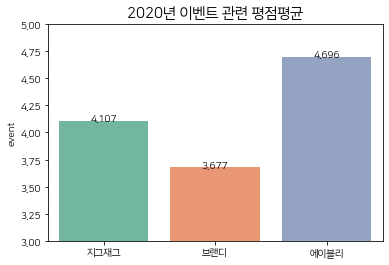

In [13]:
g = sns.barplot(x= 'company', y='event', palette = 'Set2',data = rating_2020)

for i in range(rating_2020.shape[0]):
    g.text(x = i, y = round(rating_2020.iloc[i]['event'],3),
           s = round(rating_2020.iloc[i]['event'],3),
          horizontalalignment = 'center')
    
plt.ylim(3,5)
plt.xlabel('')
plt.title('2020년 이벤트 관련 평점평균', fontsize=15)

Text(0.5, 1.0, '2020년 배송 관련 평점평균')

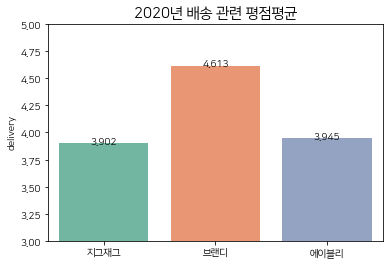

In [14]:
g = sns.barplot(x= 'company', y='delivery',palette = 'Set2',data = rating_2020)

for i in range(rating_2020.shape[0]):
    g.text(x = i, y = round(rating_2020.iloc[i]['delivery'],3),
           s = round(rating_2020.iloc[i]['delivery'],3),
          horizontalalignment = 'center')

plt.ylim(3,5)
plt.xlabel('')
plt.title('2020년 배송 관련 평점평균', fontsize=15)

Text(0.5, 1.0, '2020년 무료배송 관련 평점평균')

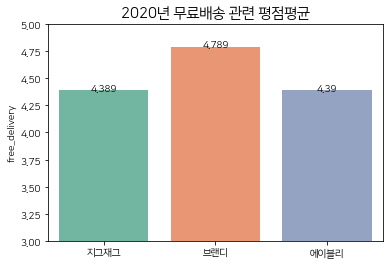

In [15]:
g = sns.barplot(x= 'company', y='free_delivery',palette = 'Set2',data = rating_2020)

for i in range(rating_2020.shape[0]):
    g.text(x = i, y = round(rating_2020.iloc[i]['free_delivery'],3),
           s = round(rating_2020.iloc[i]['free_delivery'],3),
          horizontalalignment = 'center')

plt.ylim(3,5)
plt.xlabel('')
plt.title('2020년 무료배송 관련 평점평균', fontsize=15)

Text(0.5, 1.0, '2020년 쿠폰 관련 평점평균')

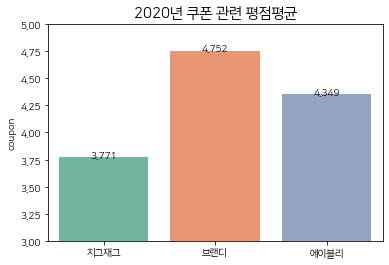

In [16]:
g = sns.barplot(x= 'company', y='coupon',palette = 'Set2',data = rating_2020)

for i in range(rating_2020.shape[0]):
    g.text(x = i, y = round(rating_2020.iloc[i]['coupon'],3),
           s = round(rating_2020.iloc[i]['coupon'],3),
          horizontalalignment = 'center')
    
plt.ylim(3,5)
plt.xlabel('')
plt.title('2020년 쿠폰 관련 평점평균', fontsize=15)